In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Vegetable Images'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 199 images belonging to 3 classes.
Found 49 images belonging to 3 classes.


In [ ]:
first_model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(1,(3,3) ,activation='relu' ,input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(2,(3,3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')
])

first_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

first_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 1)    │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 2)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2)              │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='best_veg_model.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
model_hist=first_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.0000e+00 - loss: 1.6830

7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 7s/step - accuracy: 0.0000e+00 - loss: 1.6791 - val_accuracy: 0.0000e+00 - val_loss: 1.5956 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.0119 - loss: 1.5430

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.0129 - loss: 1.5386 - val_accuracy: 0.0204 - val_loss: 1.4594 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.0445 - loss: 1.4079

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.0465 - loss: 1.4035 - val_accuracy: 0.0612 - val_loss: 1.3502 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.1084 - loss: 1.2912

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.1061 - loss: 1.2900 - val_accuracy: 0.1429 - val_loss: 1.2667 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.1419 - loss: 1.2242

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 443ms/step - accuracy: 0.1468 - loss: 1.2215 - val_accuracy: 0.2041 - val_loss: 1.2021 - learning_rate: 0.0010
Epoch 6/20
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3337 - loss: 1.1554

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 357ms/step - accuracy: 0.3445 - loss: 1.1536 - val_accuracy: 0.3469 - val_loss: 1.1518 - learning_rate: 0.0010
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.5399 - loss: 1.1175

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.5484 - loss: 1.1160 - val_accuracy: 0.5102 - val_loss: 1.1138 - learning_rate: 0.0010
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.7293 - loss: 1.0764

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.7298 - loss: 1.0764 - val_accuracy: 0.6327 - val_loss: 1.0860 - learning_rate: 0.0010
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7537 - loss: 1.0625

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.7587 - loss: 1.0615 - val_accuracy: 0.7143 - val_loss: 1.0647 - learning_rate: 0.0010
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.8919 - loss: 1.0377

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.8891 - loss: 1.0379 - val_accuracy: 0.7755 - val_loss: 1.0471 - learning_rate: 0.0010
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.8852 - loss: 1.0285

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.8851 - loss: 1.0284 - val_accuracy: 0.8571 - val_loss: 1.0325 - learning_rate: 0.0010
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.9342 - loss: 1.0158

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 383ms/step - accuracy: 0.9324 - loss: 1.0157 - val_accuracy: 0.9184 - val_loss: 1.0192 - learning_rate: 0.0010
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9494 - loss: 1.0070

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.9507 - loss: 1.0066 - val_accuracy: 0.9184 - val_loss: 1.0067 - learning_rate: 0.0010
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9862 - loss: 0.9957

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.9848 - loss: 0.9954 - val_accuracy: 0.9592 - val_loss: 0.9951 - learning_rate: 0.0010
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9774 - loss: 0.9864

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.9784 - loss: 0.9860 - val_accuracy: 0.9796 - val_loss: 0.9842 - learning_rate: 0.0010
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.9927 - loss: 0.9773

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.9930 - loss: 0.9769 - val_accuracy: 1.0000 - val_loss: 0.9737 - learning_rate: 0.0010
Epoch 17/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9975 - loss: 0.9674

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.9972 - loss: 0.9672 - val_accuracy: 1.0000 - val_loss: 0.9639 - learning_rate: 0.0010
Epoch 18/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 1.0000 - loss: 0.9564

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 444ms/step - accuracy: 1.0000 - loss: 0.9563 - val_accuracy: 1.0000 - val_loss: 0.9544 - learning_rate: 0.0010
Epoch 19/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 1.0000 - loss: 0.9491

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 1.0000 - loss: 0.9489 - val_accuracy: 1.0000 - val_loss: 0.9455 - learning_rate: 0.0010
Epoch 20/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 1.0000 - loss: 0.9410

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 1.0000 - loss: 0.9408 - val_accuracy: 1.0000 - val_loss: 0.9367 - learning_rate: 0.0010


In [ ]:
import matplotlib.pyplot as plt

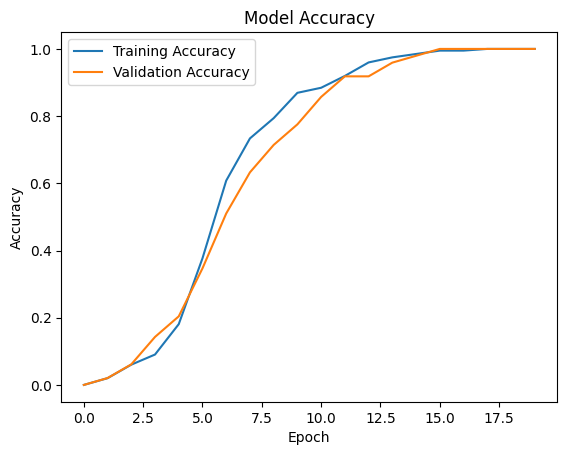

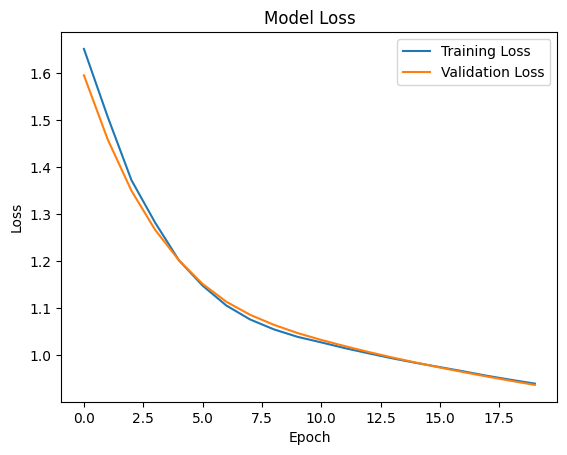

In [ ]:
# Accuracy
plt.plot(model_hist.history['accuracy'], label='Training Accuracy')
plt.plot(model_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(model_hist.history['loss'], label='Training Loss')
plt.plot(model_hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


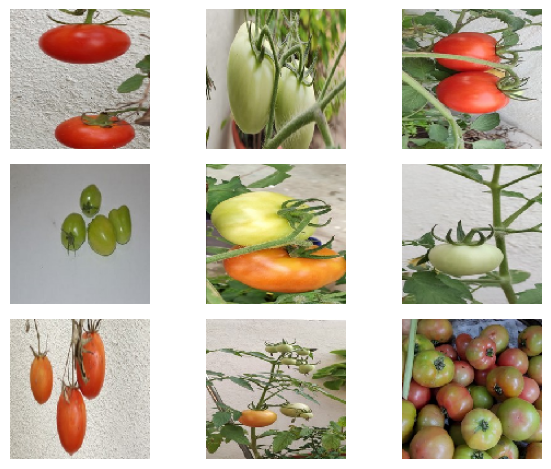

In [ ]:
images, labels = next(train_generator)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()